In [33]:
import numpy as np
import sklearn.preprocessing as sp

**均值移除：平均值为0，标准差为1**
+ scale函数实现均值移除
+ array为原数组，返回A为均值移除后的结果
+ A = sp.scale(array)

In [34]:
data = np.array([[24,1,7000],[25,2,8000],[38,10,8500]])

In [35]:
res = sp.scale(data)
res

array([[-0.78406256, -0.82760589, -1.33630621],
       [-0.62725005, -0.57932412,  0.26726124],
       [ 1.41131261,  1.40693001,  1.06904497]])

In [36]:
res.mean(axis=0)

array([0.00000000e+00, 7.40148683e-17, 5.18104078e-16])

In [37]:
res.std(axis=0)

array([1., 1., 1.])

In [38]:
res.var(axis=0)

array([1., 1., 1.])

**范围缩放：映射区间一般设置为[0,1]**
1. 创建MinMax缩放器
    + mms = sp.MinMaxScaler(feature_range(0,1))
2. 调用mms对象的方法执行缩放操作，返回缩放过后的结果
    + res = mms.fit_transform(原始样本矩阵)

In [39]:
mms = sp.MinMaxScaler(feature_range=(0,1))
res = mms.fit_transform(data)
res

array([[0.        , 0.        , 0.        ],
       [0.07142857, 0.11111111, 0.66666667],
       [1.        , 1.        , 1.        ]])

**二值化：根据给定的阈值，用0和1表示特征值不高于或高于阈值，简化数学模型**
1. 给出阈值，获取二值化器
    + bin = sp.Binarizer(threshold=阈值) 
2. 调用transform方法对原始样本矩阵进行二值化预处理操作
    + res = bin.transform(原始矩阵)

In [40]:
bin = sp.Binarizer(threshold=5)
bin_samples = bin.transform(data)
bin_samples

array([[1, 0, 1],
       [1, 0, 1],
       [1, 1, 1]])

**二值化处理图片simple**

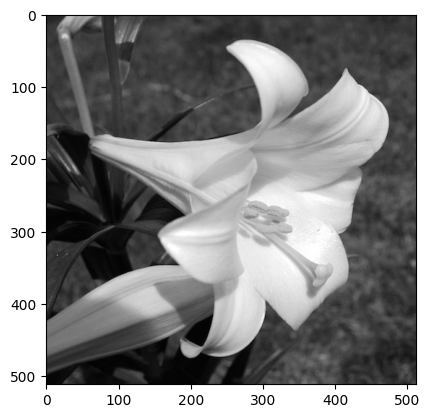

In [41]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('./data/lily.jpg',0)
plt.imshow(img,cmap='gray')
plt.show()

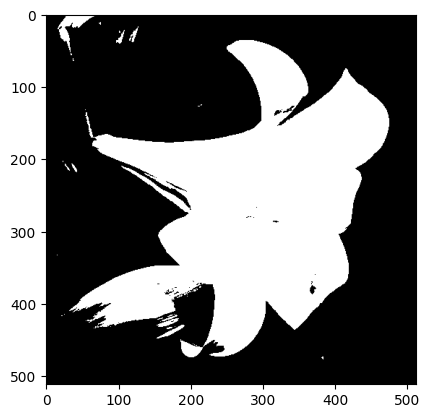

In [42]:
bin_sim = sp.Binarizer(threshold=127)
res = bin_sim.transform(img)
plt.imshow(res,cmap='gray')
plt.show()

**归一化：每个样本的每个特征值除以该样本各个特征值绝对值的总和**
+ 变换后的样本矩阵，每个样本的特征值绝对值之和为1
+ 观察的是样本各个特征占比情况

归一化API：
+ array 原始样本矩阵
+ norm 范数
+ l1 - l1范数，向量中各元素绝对值之和
+ l2 - l2范数，向量中各元素平方之和
+ 返回归一化预处理之后的样本矩阵
sp.normalize(array,norm='l1)

In [43]:
data2 = np.array([[20,10,5],[4,2,1],[15,11,13]])
data2

array([[20, 10,  5],
       [ 4,  2,  1],
       [15, 11, 13]])

In [44]:
res = sp.normalize(data2,norm='l1')
res

array([[0.57142857, 0.28571429, 0.14285714],
       [0.57142857, 0.28571429, 0.14285714],
       [0.38461538, 0.28205128, 0.33333333]])

In [45]:
np.abs(res).sum(axis=1)  # l1范数，因此向量中各元素绝对值之和为1

array([1., 1., 1.])

In [46]:
res = sp.normalize(data2,norm='l2')
res

array([[0.87287156, 0.43643578, 0.21821789],
       [0.87287156, 0.43643578, 0.21821789],
       [0.66097897, 0.48471791, 0.57284844]])

In [47]:
(np.abs(res)**2).sum(axis=1)  # l2范数，因此向量中各元素平方之和为1

array([1., 1., 1.])

**独热编码：为样本特征的每个值建立一个由一个1和若干个0组成的序列，用该序列对所有的特征值进行编码**
+ 根据每个特征的离散值来决定位数，当一列特征有三个不同离散值时，需要三位二进制数进行表达
+ 第一个为：100；第二个为：010；第三个为：001

**独热编码API**
+ 创建一个独热编码器
+ sparse：是否使用紧缩格式（稀疏矩阵）
+ dtype：数据类型
ohe = sp.OneHotEncoder(sparse=是否采用紧缩格式，dtype=数据类型)

+ 对原始样本矩阵进行处理，返回独热编码后的样本矩阵
res = ohe.fit_transform(原始样本矩阵)

ohe = sp.OneHotEncoder(sparse=是否采用紧缩格式，dtype=数据类型)
+ 对原始样本矩阵进行训练，得到编码字典
encode_dict = ohe.fit(原始样本矩阵)

+ 调用encode_dict字典的transform方法，对数据样本矩阵进行独热编码
res = encode_dict.transform(原始样本矩阵)

In [49]:
data3 = np.array([[1,3,2],[7,5,4],[1,8,6],[7,3,9]])
# 独热编码器
ohe = sp.OneHotEncoder(sparse=False)
# 训练数据
res = ohe.fit_transform(data3)
res

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [51]:
res.toarray()  # 查看稀疏矩阵的具体形式或者通过参数指定，直接显示

array([[1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1.]])